In [1]:
import pandas as pd             
import numpy as np              
import seaborn as sns           
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, roc_curve, classification_report)

import joblib

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

In [6]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

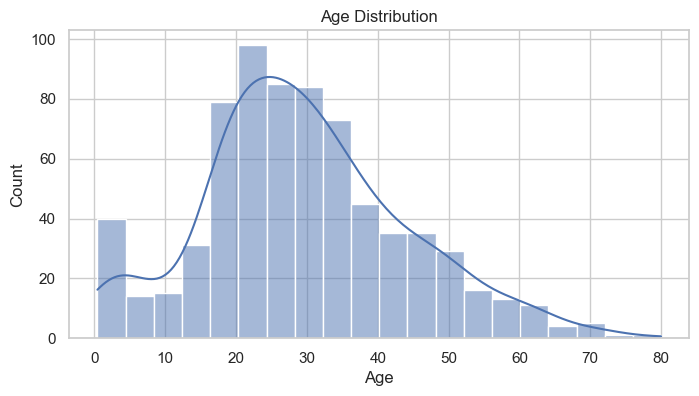

In [8]:
# Histogram for Age distribution
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

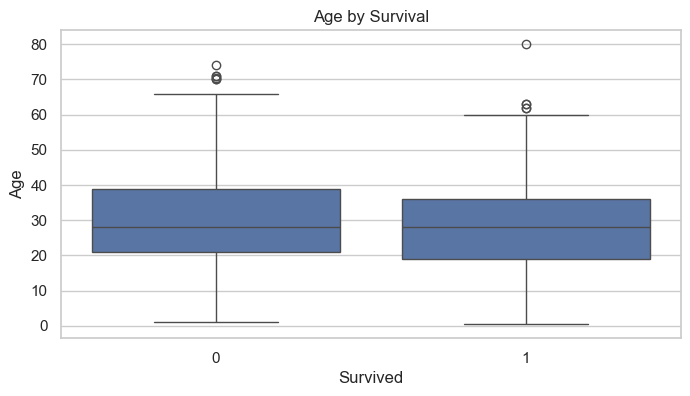

In [9]:
# Boxplot of Age by Survival
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age by Survival')
plt.show()

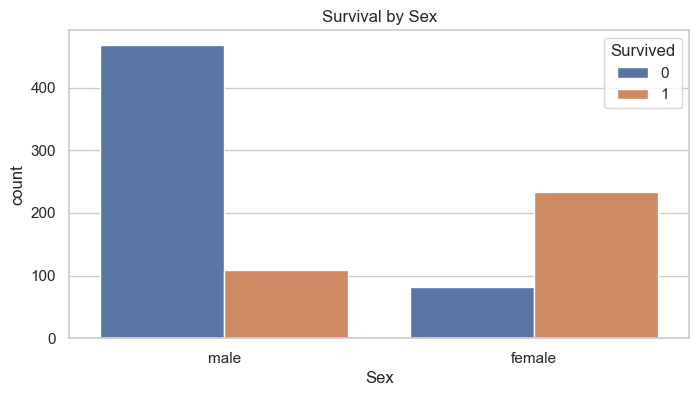

In [10]:
# Countplot of Sex
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Sex')
plt.show()

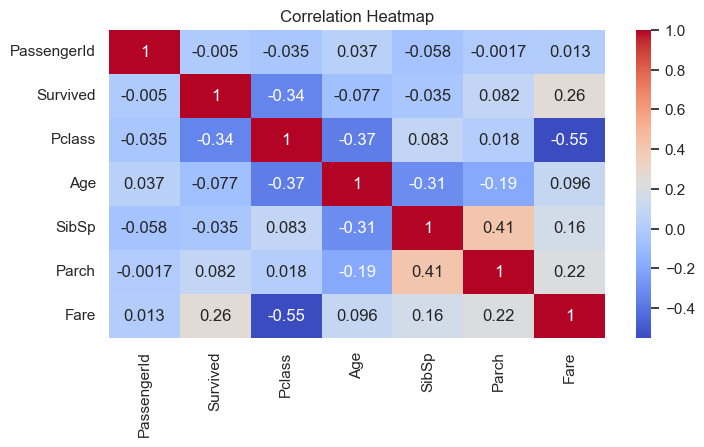

In [11]:
# Correlation heatmap
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Fill missing Age with median and Embarked with mode
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

C:\Users\pujitha tummala\AppData\Local\Temp\ipykernel_22472\1481683725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\pujitha tummala\AppData\Local\Temp\ipykernel_22472\1481683725.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [13]:
# Fill Fare in test set if missing
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\pujitha tummala\AppData\Local\Temp\ipykernel_22472\3054323198.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [14]:
# Encode 'Sex' and 'Embarked'
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

In [15]:
# Drop columns that won’t be used
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

In [16]:
# Confirm changes
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [17]:
# Define features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [18]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Save the trained model
joblib.dump(model, "titanic_model.pkl")

['titanic_model.pkl']

In [21]:
# Predict on validation data
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

In [22]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8823680823680824


In [23]:
# Classification report
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



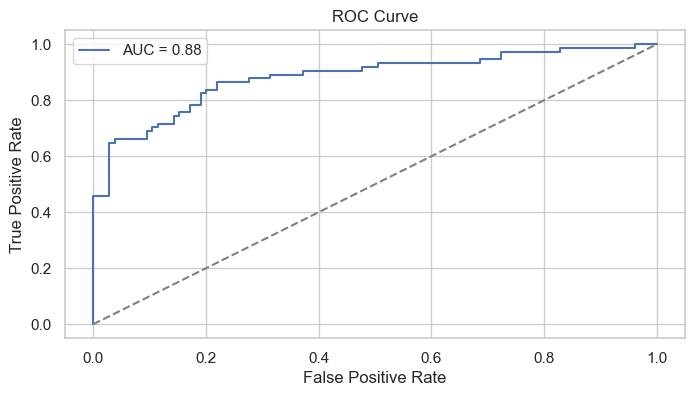

In [24]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_val, y_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [25]:
# Create a DataFrame of feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': X.columns,'Coefficient': model.coef_[0]})

In [26]:
# Sort by absolute value of coefficients
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

In [27]:
# Display coefficients
print(coeff_df[['Feature', 'Coefficient']])

    Feature  Coefficient
1       Sex     2.597154
0    Pclass    -0.931087
3     SibSp    -0.294304
6  Embarked    -0.218553
4     Parch    -0.111686
2       Age    -0.030439
5      Fare     0.002532


In [1]:
#1. What is the difference between precision and recall?

#Precision measures the accuracy of the positive predictions.
#Precision = True Positives / (True Positives + False Positives)
#High precision means that there are few false positives.
#Recall, measures the ability of the model to detect all actual positive instances. 
#Recall = True Positives / (True Positives + False Negatives)
#High recall means that there are few false negatives.

In [2]:
#2. What is cross-validation, and why is it important in binary classification?

#Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the data into multiple parts or "folds". The most common form is k-fold cross-validation, where the dataset is divided into k equal parts. The model is trained on k−1 parts and tested on the remaining part. This process is repeated k times, with each part used once as the test set.
#This method is important because it gives a better estimate of how the model will perform on unseen data, helping to reduce problems like overfitting or underfitting. It ensures that the model's performance is not dependent on just one specific split of the data.
#In binary classification, cross-validation is especially useful when dealing with imbalanced classes. It helps ensure that both classes are fairly represented in training and testing sets, especially if stratified cross-validation is used, which maintains the class distribution across folds.